<a href="https://colab.research.google.com/github/KyuDan1/audio_playground/blob/main/%EC%96%B4%EC%A1%B0%EB%B0%94%EA%BE%B8%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install librosa soundfile


In [633]:
en_hello = '/content/drive/MyDrive/audio_experiment/en_hello.wav'
kr_hello = '/content/drive/MyDrive/audio_experiment/kr_hello.wav'

# 다시

In [634]:
import librosa
import soundfile as sf
import numpy as np
en_hello = '/content/drive/MyDrive/audio_experiment/en_hello.wav'
kr_hello = '/content/drive/MyDrive/audio_experiment/kr_hello.wav'
# WAV 파일 로드
def load_wav(filename):
    y, sr = librosa.load(filename, sr=None)  # 원본 샘플링 레이트로 로드
    return y, sr

# STFT 수행
def stft_audio(y, n_fft=2048, hop_length=512, win_length=None):
    if not win_length:
        win_length = n_fft
    D = librosa.stft(y, n_fft=n_fft, hop_length=hop_length, win_length=win_length)
    return D

# 역 STFT 수행
def istft_audio(D, n_fft=2048, hop_length=512, win_length=None):
    if not win_length:
        win_length = n_fft
    y = librosa.istft(D, hop_length=hop_length, win_length=win_length)
    return y

# 파일 저장
def save_wav(y, sr, filename):
    sf.write(filename, y, sr)

# 파일 로드 및 STFT, 역 STFT 수행
def process_audio(input_filename, output_filename):
    y, sr = load_wav(input_filename)
    D = stft_audio(y)
    y_reconstructed = istft_audio(D)
    save_wav(y_reconstructed, sr, output_filename)

## hello 영어식 발음

In [635]:
import IPython.display as ipd
ipd.display(ipd.Audio(en_hello))

## 헬로 한국식 발음

In [636]:
import IPython.display as ipd
ipd.display(ipd.Audio(kr_hello))

In [637]:
y1, sr1 = load_wav(en_hello)
y2, sr2 = load_wav(kr_hello)


In [638]:
sr1

48000

### Short Time Fourier Transformation

In [639]:
D1 = stft_audio(y1)
D2 = stft_audio(y2)

In [640]:
D1

array([[-2.7638383e-03+0.00000000e+00j,  3.1504217e-03+0.00000000e+00j,
        -1.7902036e-01+0.00000000e+00j, ...,
         2.7805572e-02+0.00000000e+00j,  5.0891325e-02+0.00000000e+00j,
         2.2047819e-03+0.00000000e+00j],
       [-3.8075615e-03-1.09302520e-03j,  1.5767114e-02+8.00778065e-03j,
        -7.2830766e-02-1.75495505e-01j, ...,
        -1.0197424e-02+8.49292725e-02j, -2.2937728e-02-5.27983829e-02j,
         1.8633312e-03-9.62792139e-04j],
       [-3.1705452e-03-5.45709813e-03j, -2.5635619e-02+3.24950479e-02j,
         2.1457408e-01-8.22134763e-02j, ...,
         1.2975934e-01-1.78892404e-01j, -5.4860529e-02+3.43267322e-02j,
         1.1757828e-03-1.42303796e-03j],
       ...,
       [ 7.3171564e-06-1.55005782e-05j, -6.0642127e-05+1.84812845e-04j,
         3.7619058e-05-3.78628116e-04j, ...,
        -3.5326959e-06+1.17384570e-05j, -6.9943409e-05-1.49640895e-04j,
         6.2914536e-05+5.71853598e-05j],
       [ 1.3930836e-05-1.05854515e-05j, -1.1287947e-04-1.16873060e-0

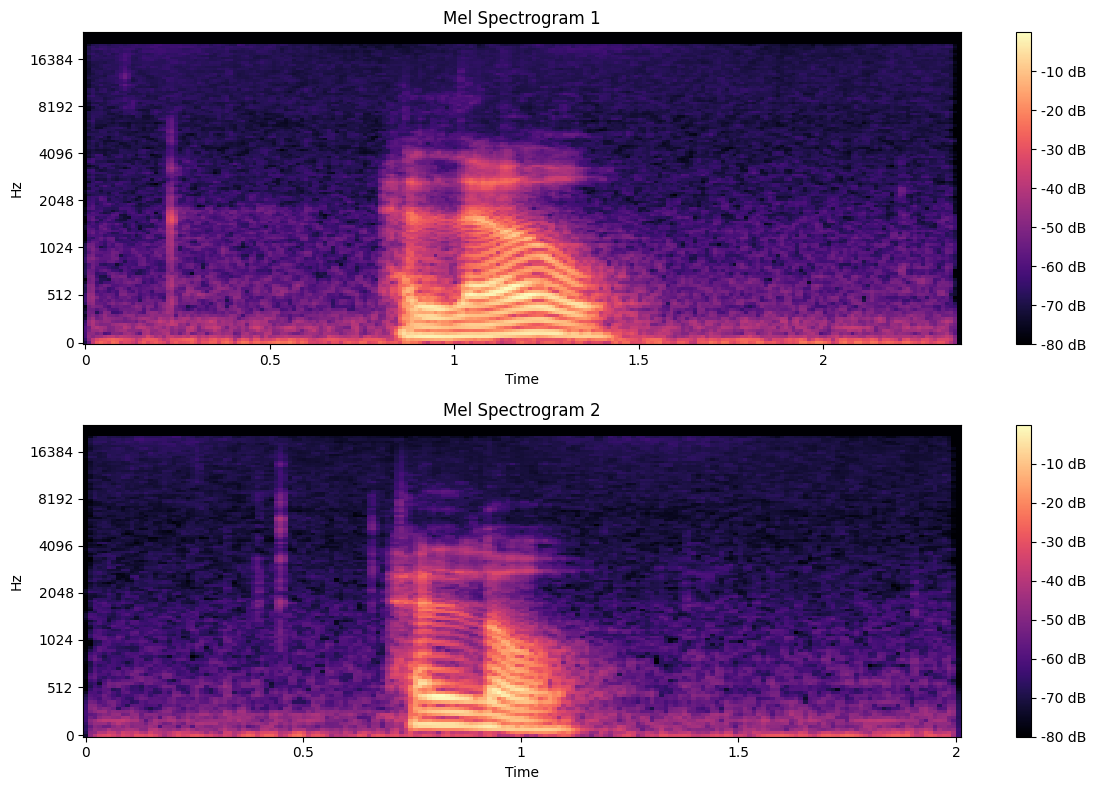

In [641]:
# 멜 스펙트로그램 계산 및 시각화
fig, ax = plt.subplots(2, 1, figsize=(12, 8))

for i, (D, sr) in enumerate([(D1, sr1), (D2, sr2)], start=1):
    S, phase = librosa.magphase(D)  # 크기와 위상 분리
    mel_basis = librosa.filters.mel(sr=sr, n_fft=2048)  # 멜 필터 뱅크 생성
    mel_S = np.dot(mel_basis, S)  # 멜 스펙트로그램 계산

    plt.subplot(2, 1, i)
    librosa.display.specshow(librosa.amplitude_to_db(mel_S, ref=np.max),
                             y_axis='mel', x_axis='time', sr=sr)
    plt.colorbar(format='%+2.0f dB')
    plt.title(f'Mel Spectrogram {i}')
    plt.tight_layout()

plt.show()

## D1데이터의 실수부, 허수부, 크기, 페이저

In [642]:
en_hello_real = D1.real
en_hello_imag = D1.imag
en_hello_abs = np.abs(D1)
en_hello_phase = np.angle(D1)

In [643]:
kr_hello_real = D2.real
kr_hello_imag = D2.imag
kr_hello_abs = np.abs(D2)
kr_hello_phase = np.angle(D2)

In [644]:
D1.real

array([[-2.7638383e-03,  3.1504217e-03, -1.7902036e-01, ...,
         2.7805572e-02,  5.0891325e-02,  2.2047819e-03],
       [-3.8075615e-03,  1.5767114e-02, -7.2830766e-02, ...,
        -1.0197424e-02, -2.2937728e-02,  1.8633312e-03],
       [-3.1705452e-03, -2.5635619e-02,  2.1457408e-01, ...,
         1.2975934e-01, -5.4860529e-02,  1.1757828e-03],
       ...,
       [ 7.3171564e-06, -6.0642127e-05,  3.7619058e-05, ...,
        -3.5326959e-06, -6.9943409e-05,  6.2914536e-05],
       [ 1.3930836e-05, -1.1287947e-04, -2.3350563e-05, ...,
        -1.0778997e-04,  4.7592421e-05,  3.2387252e-05],
       [ 1.8533945e-05,  1.3917015e-04,  8.3202503e-05, ...,
         1.1856234e-04, -1.5639556e-05, -5.5839988e-05]], dtype=float32)

In [645]:
en_hello_phase.shape

(1025, 223)

In [646]:
kr_hello_phase.shape

(1025, 189)

## 영어식 음성이 shape (1025,223)
## 한국식 음성이 shape (1025,189)
## 영어식 음성 뒤를 잘라서 shape을 맞춰줄거임

In [647]:
en_hello_phase = en_hello_phase[:, :189]
en_hello_real = en_hello_real[:, :189]
en_hello_imag = en_hello_imag[:, :189]
en_hello_abs = en_hello_abs[:, :189]

## Phase의 차이를 보고싶음.

In [648]:
#delta_phase = kr_hello_phase - en_hello_phase
delta_phase = abs(kr_hello_phase - en_hello_phase)

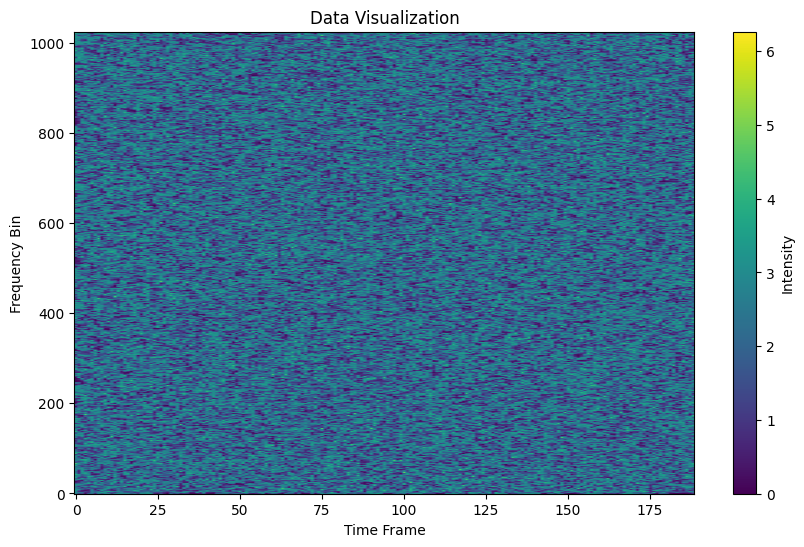

In [652]:
import numpy as np
import matplotlib.pyplot as plt

data = delta_phase

# 데이터 시각화
plt.figure(figsize=(10, 6))
plt.imshow(data, aspect='auto', origin='lower', cmap='viridis')
plt.colorbar(label='Intensity')
plt.title('Data Visualization')
plt.xlabel('Time Frame')
plt.ylabel('Frequency Bin')
plt.show()


## 작게 보이는 푸른 점들이 차이가 큰 부분이고, 이 부분이 '어조' 정보를 가지고 있다고 해석할 수 있음.

## 그 이유는 말하는 사람이 같고, 같은 단어를 말했기 때문.

# 그렇다면, 영어식 발음의 푸른 부분만 가져와서 한국식 발음의 푸른 부분에 넣어버리면 한국식 발음이 영어식 발음처럼 들릴 것이라고 가정!


## phaser 델타 값이 100이상인 데이터가 '어조' 특징이라고 가정.

### 그러한 데이터의 index 들을 가져오고

In [621]:
ipd.display(ipd.Audio(kr_hello))

In [653]:
189 * 1025

193725

In [654]:
threshold_9 = 9
indices_9 = np.where(np.abs(data) >= threshold_9)

print(len(indices_9[0])/(189 * 1025) *100, "% changed")

kr_hello_phase[indices_9] = en_hello_phase[indices_9]
kr_hello_real[indices_9] = en_hello_real[indices_9]
kr_hello_imag[indices_9] = en_hello_imag[indices_9]

re_build_9 = kr_hello_real + 1j * kr_hello_imag
y_reconstructed = istft_audio(re_build_9)
save_wav(y_reconstructed, 48000, 'output_9.wav')

filename = 'output_9.wav'
ipd.display(ipd.Audio(filename))

0.0 % changed


In [655]:
threshold_5 = 5
indices_5 = np.where(np.abs(data) >= threshold_5)

print(len(indices_5[0])/(189 * 1025) *100, "% changed")
kr_hello_phase[indices_5] = en_hello_phase[indices_5]
kr_hello_real[indices_5] = en_hello_real[indices_5]
kr_hello_imag[indices_5] = en_hello_imag[indices_5]

re_build_5 = kr_hello_real + 1j * kr_hello_imag
y_reconstructed = istft_audio(re_build_5)
save_wav(y_reconstructed, 48000, 'output_5.wav')

filename = 'output_5.wav'
ipd.display(ipd.Audio(filename))

4.0929152148664345 % changed


In [656]:
threshold_4 = 4
indices_4 = np.where(np.abs(data) >= threshold_4)
print(len(indices_4[0])/(189 * 1025) *100, "% changed")
kr_hello_phase[indices_4] = en_hello_phase[indices_4]
kr_hello_real[indices_4] = en_hello_real[indices_4]
kr_hello_imag[indices_4] = en_hello_imag[indices_4]

re_build_4 = kr_hello_real + 1j * kr_hello_imag
y_reconstructed = istft_audio(re_build_4)
save_wav(y_reconstructed, 48000, 'output_4.wav')

filename = 'output_4.wav'
ipd.display(ipd.Audio(filename))

13.062330623306234 % changed


In [657]:
threshold_2 = 2
indices_2 = np.where(np.abs(data) >= threshold_2)

print(len(indices_2[0])/(189 * 1025) *100, "% changed")

kr_hello_phase[indices_2] = en_hello_phase[indices_2]
kr_hello_real[indices_2] = en_hello_real[indices_2]
kr_hello_imag[indices_2] = en_hello_imag[indices_2]

re_build_2 = kr_hello_real + 1j * kr_hello_imag
y_reconstructed = istft_audio(re_build_2)
save_wav(y_reconstructed, 48000, 'output_2.wav')

filename = 'output_2.wav'
ipd.display(ipd.Audio(filename))

46.15356820234869 % changed


In [658]:
threshold_1 = 1
indices_1 = np.where(np.abs(data) >= threshold_1)

print(len(indices_1[0])/(189 * 1025) *100, "% changed")
kr_hello_phase[indices_1] = en_hello_phase[indices_1]
kr_hello_real[indices_1] = en_hello_real[indices_1]
kr_hello_imag[indices_1] = en_hello_imag[indices_1]

re_build_1 = kr_hello_real + 1j * kr_hello_imag
y_reconstructed = istft_audio(re_build_1)
save_wav(y_reconstructed, 48000, 'output_1.wav')

filename = 'output_1.wav'
ipd.display(ipd.Audio(filename))

70.25990450380695 % changed


## 영어식 발음의 그 index를 가진 부분을 한국식 발음의 index에 넣어버림.

## 다시 복소수 데이터로 변환

In [659]:
ipd.display(ipd.Audio(en_hello))

In [660]:
ipd.display(ipd.Audio(kr_hello))

In [661]:
flattened_delta = delta_phase.flatten()

(array([37508., 32950., 28740., 24854., 21310., 17356., 13525.,  9681.,
         5748.,  2053.]),
 array([0.        , 0.62626064, 1.25252128, 1.87878203, 2.50504255,
        3.13130331, 3.75756407, 4.38382483, 5.01008511, 5.63634586,
        6.26260662]),
 <BarContainer object of 10 artists>)

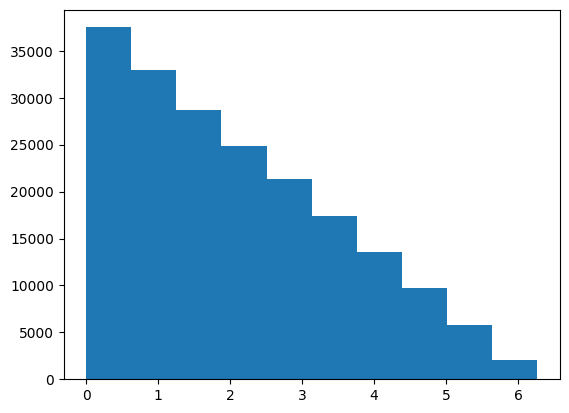

In [662]:
plt.hist(flattened_delta)

In [663]:
"""for idx in zip(indices[0], indices[1]):
    print(idx)"""

'for idx in zip(indices[0], indices[1]):\n    print(idx)'